   # BHARATH INTERN

# TASK - 01

# **SMS SPAM- HAM CLASSIFIER**





### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.naive_bayes import GaussianNB as gm
from sklearn.naive_bayes import MultinomialNB as mm
from sklearn.naive_bayes import BernoulliNB as bm
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [4]:
df=pd.read_csv(r"C:\Users\hp\Desktop\project\spam.csv",encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2055,ham,"Sir, I am waiting for your mail.",NaN,NaN,NaN
3563,ham,Do you always celebrate NY's with your family ?,NaN,NaN,NaN
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,NaN,NaN,NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1245,ham,Hello which the site to download songs its urg...,NaN,NaN,NaN


## 1. DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
4011,ham,Discussed with your mother ah?
1515,ham,I wonder if you'll get this text?
432,spam,Congrats! Nokia 3650 video camera phone is you...
3562,spam,Auction round 4. The highest bid is now å£54. ...


In [5]:
#RENAMING THE COLUMN NAMES
df.rename(columns={'v1':'target','v2':'sms'},inplace=True)
df.sample(10)

,target,sms
425,ham,Ok. She'll be ok. I guess
4246,spam,Text PASS to 69669 to collect your polyphonic ...
5170,ham,I'm in school now n i'll be in da lab doing so...
5339,ham,You'd like that wouldn't you? Jerk!
3758,ham,"GOD ASKED, \What is forgiveness?\"" A little ch..."
3794,ham,Also remember the beads don't come off. Ever.
4910,ham,Love that holiday Monday feeling even if I hav...
5135,ham,Sorry * was at the grocers.
637,ham,When Ì_ login dat time... Dad fetching Ì_ home...
4403,ham,"Sorry, I'll call later &lt;#&gt; mins"


In [6]:
# SETTING 0-HAM 1-SPAM SMS USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,sms
874,0,Talk With Yourself Atleast Once In A Day...!!!...
1604,0,"God picked up a flower and dippeditinaDEW, lov..."
3015,0,"&lt;#&gt; is fast approaching. So, Wish u a v..."
4816,0,Me too. Mark is taking forever to pick up my p...
970,0,"Yar lor he wan 2 go c horse racing today mah, ..."


In [7]:
#Check missing values
df.isnull().sum()

target    0
sms       0
dtype: int64

In [8]:
#Check duplicate values (rows)
df.duplicated().sum()

np.int64(403)

In [9]:
# Remove duplicated values by keeping first occurence only
df=df.drop_duplicates(keep='first')


In [10]:
df.duplicated().sum() # all duplicate rows removed

np.int64(0)

## 2. Exploratory Data Analysis(EDA)

In [11]:
df['target'].value_counts()
# 0- ham 1- spam

target
0    4516
1     653
Name: count, dtype: int64

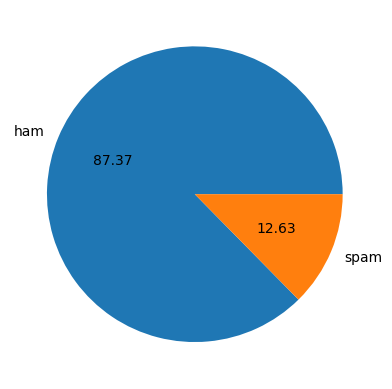

In [12]:
# to visualize nicely target column
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['char_count']=df['sms'].apply(len)

In [15]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
pip install --upgrade nltk


Note: you may need to restart the kernel to use updated packages.


In [18]:
df['words_count']=df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['sent_count']=df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
df.head(6)

,target,sms,char_count,words_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4


In [21]:
df.describe()

,target,char_count,words_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# HAM
df[df['target']==0][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# SPAM
df[df['target']==1][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [24]:
# plot histogram for both category

<Axes: xlabel='char_count', ylabel='Count'>

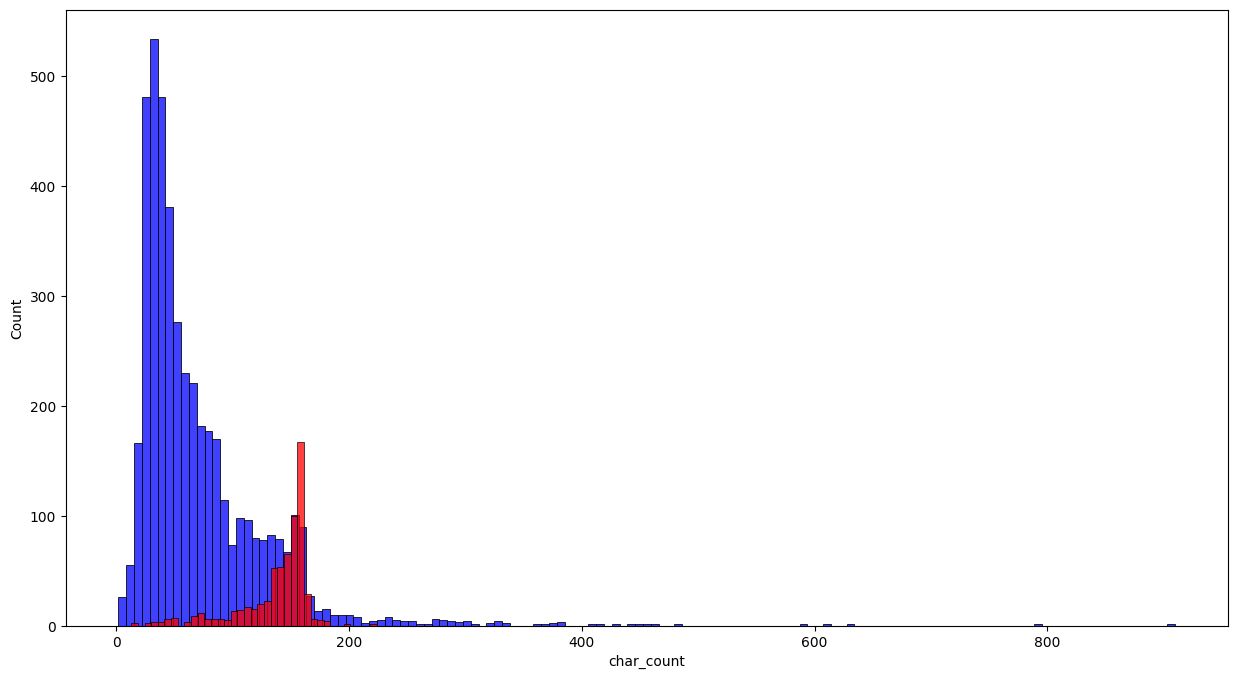

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['char_count'],color='blue')
sns.histplot(df[df['target']==1]['char_count'],color='red')


<Axes: xlabel='words_count', ylabel='Count'>

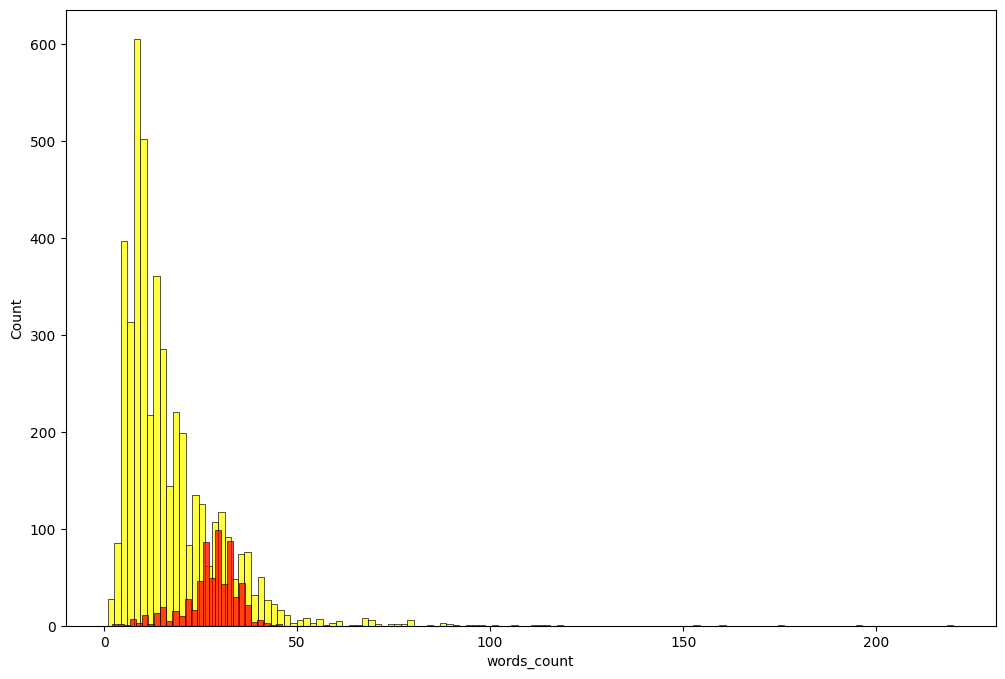

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['words_count'],color='yellow')
sns.histplot(df[df['target']==1]['words_count'],color='red')

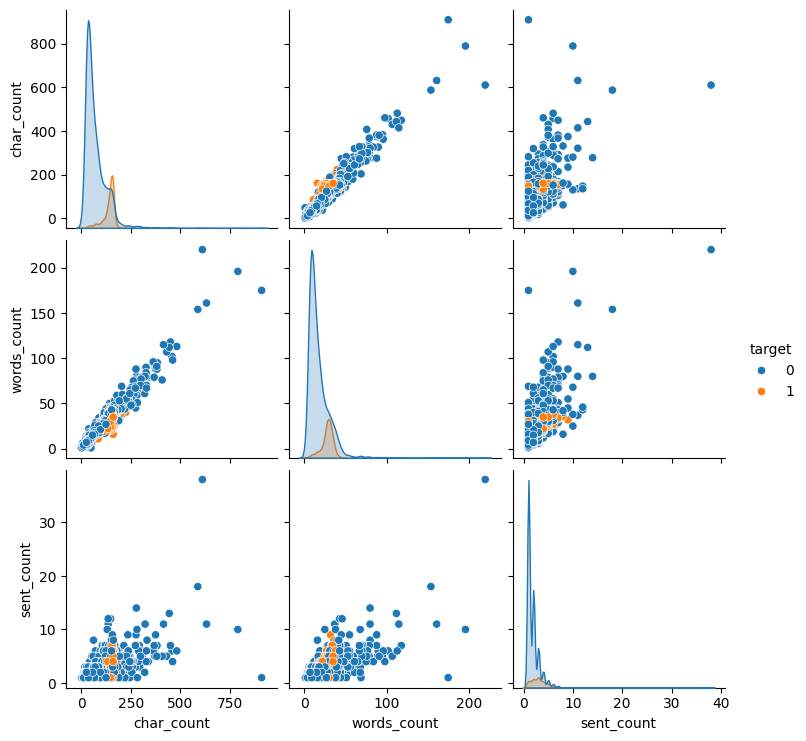

In [27]:
sns.axisgrid.pairplot(df,hue='target')

<Axes: >

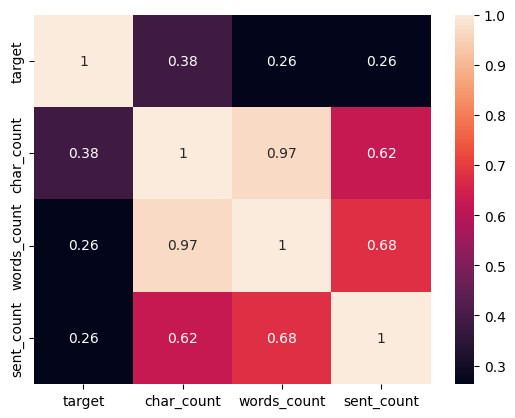

In [28]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)


## 3. DATA PREPROCESSING

##### * Lower case data
##### * Tokenization
##### * Removing special characters
##### * Removin stop words and punctautions
##### * Stemming



In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def transform_sms(sms):
    sms=sms.lower()
    sms=nltk.word_tokenize(sms)

    y=[]
    for i in sms:
        if i.isalnum():
            y.append(i)
    sms = y[:]
    y.clear()

    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    sms=y[:]
    y.clear()

    for i in sms:
        y.append(ps.stem(i))

    return " ".join(y)


In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
transform_sms("TypeError: 'TfidfVectorizer' object is not callable")

'typeerror object callabl'

In [32]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
df['transformed_sms']=df['sms'].apply(transform_sms)

In [34]:
df.sample(5)

,target,sms,char_count,words_count,sent_count,transformed_sms
4096,0,i am going to bed now prin,26,7,1,go bed prin
751,1,You have an important customer service announc...,65,10,1,import custom servic announc premier
900,0,Probably money worries. Things are coming due ...,126,24,2,probabl money worri thing come due sever outst...
1888,0,No. On the way home. So if not for the long dr...,85,21,3,way home long dri spell season would
2554,0,I'll reach in ard 20 mins ok...,31,9,1,reach ard 20 min ok


In [35]:
!pip install wordcloud
#getting most frequent used words in spam mails
from wordcloud import WordCloud
print("WordCloud library is successfully imported!")
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')


WordCloud library is successfully imported!


In [36]:
span_wc=wc.generate(df[df['target']==1]['transformed_sms'].str.cat(sep=" "))

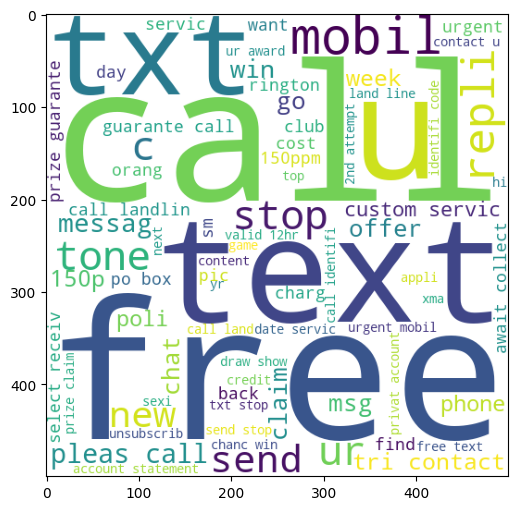

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [38]:
ham_wc=wc.generate(df[df['target']==0]['transformed_sms'].str.cat(sep=" "))

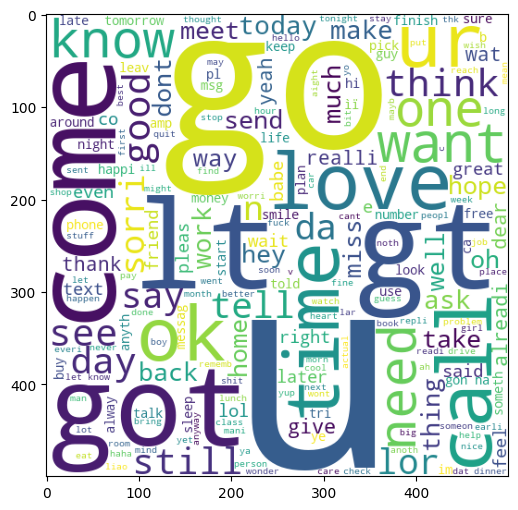

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
# to get the top 30 most used words in spam mails
spam_corpus=[]
for i in df[df['target']==1]['transformed_sms'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

In [42]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\Users\hp\AppData\Local\Temp\ipykernel_13836\3933303096.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=df_common, palette='rainbow')


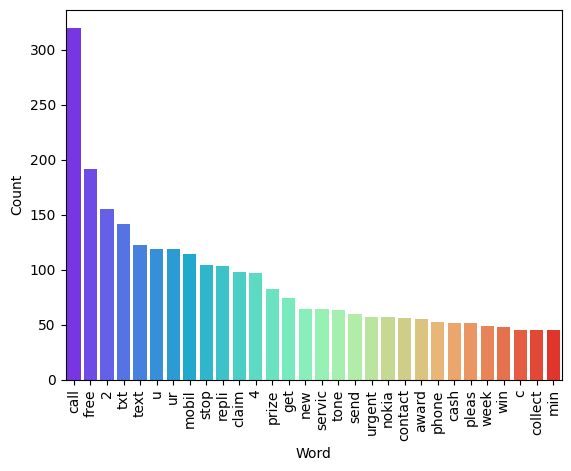

In [43]:
from collections import Counter
# Assuming spam_corpus is a list of words or tokens
spam_counter = Counter(spam_corpus)
top_30_common = spam_counter.most_common(30)

# Convert the counter result to a DataFrame
df_common = pd.DataFrame(top_30_common, columns=['Word', 'Count'])

# Plot using seaborn barplot
sns.barplot(x='Word', y='Count', data=df_common, palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()


In [44]:
# to get the top 30 most used words in ham mails
ham_corpus=[]
for i in df[df['target']==0]['transformed_sms'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

In [46]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

C:\Users\hp\AppData\Local\Temp\ipykernel_13836\1669019482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Count', data=df_common, palette= colors)


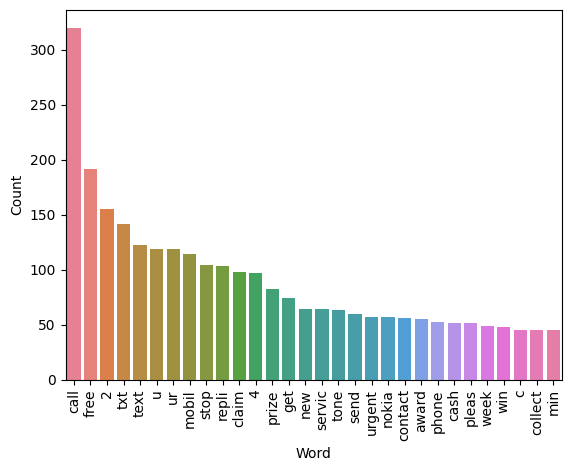

In [47]:
# Assuming spam_corpus is a list of words or tokens
spam_counter = Counter(spam_corpus)
top_30_common = spam_counter.most_common(30)

# Convert the counter result to a DataFrame
df_common = pd.DataFrame(top_30_common, columns=['Word', 'Count'])

# Plot using seaborn barplot
# Define a list of colors for each bar
colors = sns.color_palette('husl', n_colors=len(df_common))

sns.barplot(x='Word', y='Count', data=df_common, palette= colors)
plt.xticks(rotation='vertical')
plt.show()

## 4. MODEL BUILDING

In [48]:
# we are using naive baiyes classifier

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [50]:
x=tfidf.fit_transform(df['transformed_sms']).toarray()

In [51]:
x.shape

(5169, 3000)

In [52]:
y=df['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gm=GaussianNB()
mm=MultinomialNB()
bm=BernoulliNB()

In [57]:
gm.fit(x_train,y_train)
y_pred1 = gm.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)*100)

87.33075435203095
[[790 106]
 [ 25 113]]
51.598173515981735


In [58]:
mm.fit(x_train,y_train)
y_pred2 = mm.predict(x_test)
print(accuracy_score(y_test,y_pred2)*100)
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)*100)

97.09864603481626
[[896   0]
 [ 30 108]]
100.0


In [59]:
bm.fit(x_train,y_train)
y_pred3 = bm.predict(x_test)
print(accuracy_score(y_test,y_pred3)*100)
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)*100)

98.35589941972921
[[895   1]
 [ 16 122]]
99.1869918699187


In [60]:
# tfidf --> multinomialNB
#IMPROVEMENT
# max_feature=3000

In [61]:
import pickle

pickle.dump(tfidf, open(r'C:\Users\hp\Desktop\project\vectorizer.pkl', 'wb'))
pickle.dump(mm, open(r'C:\Users\hp\Desktop\project\model.pkl', 'wb'))
